# I Solving the Sum of Two Digits Programming Challenge

## C++

In [1]:
%%writefile sum.cpp
#include <iostream>

int sum_of_two_digits(int first_digit, int second_digit) {
    return first_digit + second_digit;
}

int main() {
    int a = 0;
    int b = 0;
    std::cin >> a;
    std::cin >> b;
    std::cout << sum_of_two_digits(a, b);
    return 0;
}

Overwriting sum.cpp


In [2]:
!g++ sum.cpp -o sum
!./sum < input2.txt

6

### Test input output files

In [3]:
%%writefile input1.txt
4 8

Overwriting input1.txt


In [4]:
%%writefile output1.txt
12

Overwriting output1.txt


In [5]:
%%writefile input2.txt
-5 9

In [6]:
%%writefile output2.txt
4

Overwriting output2.txt


In [7]:
!./sum < input1.txt

12

In [8]:
!./sum < input2.txt

4

### Comparing files with grep

https://askubuntu.com/questions/546796/comparing-two-text-files

In [9]:
!grep -xvFf output1.txt output1.txt 

In [10]:
!grep -xvFf output1.txt output2.txt 

4


In [184]:
!grep -xvFf output2.txt output1.txt 

12


In [185]:
!./sum < input1.txt> ctest1.txt
!grep -xvFf output1.txt ctest1.txt

11


In [186]:
!./sum < input2.txt > ctest2.txt
!grep -xvFf output2.txt ctest2.txt

7


## Python

In [187]:
%%writefile sum.py
# python3


def sum_of_two_digits(first_digit, second_digit):
    return first_digit + second_digit

if __name__ == '__main__':
    a, b = map(int, input().split())
    print(sum_of_two_digits(a, b))

Overwriting sum.py


In [188]:
!python sum.py <input2.txt

Traceback (most recent call last):
  File "sum.py", line 8, in <module>
    a, b = map(int, input().split())
ValueError: not enough values to unpack (expected 2, got 1)


In [189]:
!python sum.py  < input1.txt> ptest1.txt
!grep -xvFf output1.txt ptest1.txt

Traceback (most recent call last):
  File "sum.py", line 8, in <module>
    a, b = map(int, input().split())
ValueError: not enough values to unpack (expected 2, got 1)


In [190]:
!python sum.py  < input2.txt> ptest2.txt
!grep -xvFf output2.txt ptest2.txt

Traceback (most recent call last):
  File "sum.py", line 8, in <module>
    a, b = map(int, input().split())
ValueError: not enough values to unpack (expected 2, got 1)


# II Solving The Maximum Pairwise Product Programming Challenge in C++

## C++

### 200.000 number generation (C)

In [191]:
# Number generation
import random
line= str(200000)+"\n"

randfile = open("testfileC.txt", "w" )
randfile.write(line)
for i in range(200000):
    line = str(random.randint(1, 200000)) + " "
    randfile.write(line)

randfile.close()
print('Data written to testfileC.txt')

Data written to testfileC.txt


### Wrong solution (integer overflow)

In [192]:
%%writefile max_pairwise_product1.cpp
#include <iostream>
#include <vector>
#include <algorithm>

int MaxPairwiseProduct(const std::vector<int>& numbers) {
    int max_product = 0;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = first + 1; second < n; ++second) {
            max_product = std::max(max_product,
                numbers[first] * numbers[second]);
        }
    }

    return max_product;
}

int main() {
    int n;
    std::cin >> n;
    std::vector<int> numbers(n);
    for (int i = 0; i < n; ++i) {
        std::cin >> numbers[i];
    }

    std::cout << MaxPairwiseProduct(numbers) << "\n";
    return 0;
}


Overwriting max_pairwise_product1.cpp


In [193]:
%%time
!g++ max_pairwise_product1.cpp -o max_pairwise_product1
!./max_pairwise_product1 <input1.txt

90
CPU times: user 16.2 ms, sys: 9.04 ms, total: 25.3 ms
Wall time: 1.64 s



### Test1: Small numbers

In [68]:
%%writefile input1.txt
10
1 2 3 4 5 6 7 8 9 10

Overwriting input1.txt


In [194]:
!./max_pairwise_product1 <input1.txt

90


### Test 2: Largest input numbers 200000 200000 in the input

In [69]:
%%writefile input2.txt
5
1 3 200000 9 200000 23

Overwriting input2.txt


In [195]:
!./max_pairwise_product1 <input2.txt

1345294336


Changing the variables to long long

In [196]:
%%writefile max_pairwise_product2.cpp

#include <iostream>
#include <vector>
#include <algorithm>

long long MaxPairwiseProduct(const std::vector<int>& numbers) {
    long long max_product = 0LL;
	long long aux_product = 0LL;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = first + 1; second < n; ++second) {
			       aux_product =  (long long) numbers[first] * numbers[second];
            if ( max_product < aux_product)  {
				        max_product = aux_product;
             }
        }
    }

    return max_product;
}

int main() {
    int n;
    std::cin >> n;
    std::vector<int> numbers(n);
    for (int i = 0; i < n; ++i) {
        std::cin >> numbers[i];
    }

    std::cout << MaxPairwiseProduct(numbers) << "\n";
    return 0;
}

Overwriting max_pairwise_product2.cpp


In [197]:
!g++ max_pairwise_product2.cpp -o max_pairwise_product2
!./max_pairwise_product2 < input2.txt

40000000000


### Test 3: Stress tests 20 times random n in \[2, 20\]

In [54]:
%%writefile test_3_naive_c.cpp

#include <random>
#include <iostream>
#include <vector>
#include <algorithm>

long long MaxPairwiseProduct(const std::vector<int>& numbers) {
    long long max_product = 0LL;
	long long aux_product = 0LL;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = first + 1; second < n; ++second) {
			       aux_product =  (long long) numbers[first] * numbers[second];
            if ( max_product < aux_product)  {
				        max_product = aux_product;
             }
         }
    }

    return max_product;
}

int main() {

    std::vector<int> numbers(20);
    numbers = {1,62,3,4,10,9,80,70,19,50,6,3,1,4,9,8,7,8,15,200};
    
    for(int i = 0; i < 20; i++){
        
        int n = 2 + (rand() % static_cast<int>(20 - 2 + 1));
        std::cout<< "n: "<<n << "\t";

        std::vector<int> arr(n);
        
        for(int j = 0; j < n; j++){
            arr[j] = numbers[j];
        }
        std::cout<< "Resultado: ";
        std::cout<< MaxPairwiseProduct(arr) << "\n";
    }
}

Overwriting test_3_naive_c.cpp


In [57]:
!g++ test_3_naive_c.cpp -o test_3_naive_c

!./test_3_naive_c
!./test_3_naive_c > output3naive.txt


n: 4	Resultado: 248
n: 17	Resultado: 5600
n: 5	Resultado: 620
n: 5	Resultado: 620
n: 12	Resultado: 5600
n: 10	Resultado: 5600
n: 12	Resultado: 5600
n: 13	Resultado: 5600
n: 4	Resultado: 248
n: 9	Resultado: 5600
n: 3	Resultado: 186
n: 11	Resultado: 5600
n: 3	Resultado: 186
n: 12	Resultado: 5600
n: 3	Resultado: 186
n: 12	Resultado: 5600
n: 9	Resultado: 5600
n: 19	Resultado: 5600
n: 7	Resultado: 4960
n: 11	Resultado: 5600


### Test 4: Time test measure the execution time running with the the largest worst case file (200000 increasing numbers, 200000 and 200000 the end)

In [58]:
%%writefile Test2Write.cpp

#include <iostream>
#include <fstream>
#include <cstdlib>

using namespace std;

int main() {
  // Create and open a text file
  ofstream MyFile("input3.txt");

 MyFile << 200000 <<"\n";  // n 
 for (int i=1; i < 200001; i++){
     MyFile << i <<" ";
 }
  
  // Close the file
  MyFile.close();
}

Overwriting Test2Write.cpp


In [59]:
!g++ Test2Write.cpp -o Test2Write
!./Test2Write

In [62]:
!g++ max_pairwise_product2.cpp -o max_pairwise_product2
!time ./max_pairwise_product2 < input3.txt

39999800000

real	1m55.530s
user	1m55.174s
sys	0m0.068s


Calculate the number of instructions executed by the algorithm as a function of n, add in each line a comment with the number of instructions that are executed in that line

```
int main() {                         //N inst exec by line executed  

    int n;                            //1                      
    std::cin >> n;                    //1

    std::vector<int> numbers(n);      //n    init vector
    .
    .
 }
```

In [64]:
%%writefile test_init_vectors.cpp

#include <iostream>
#include <vector>
#include <algorithm>

int main() {                                                               
    int n = 10;                        //1                                                                                                       //1
    std::vector<int> numbers(n);       //n                                     
    for (int i = 0; i < n; ++i) {      //1+2n                                    
        std::cout << numbers[i];       //2                                      
    }

    std::cout << "\n";                 //1      
    return 0;                          //1                                    
}

//total number of operations: 6 + 3n

Writing test_init_vectors.cpp


In [65]:
!g++ test_init_vectors.cpp -o test_init_vectors
!./test_init_vectors

0000000000


In [ ]:
#include <iostream>
#include <vector>
#include <algorithm>

long long MaxPairwiseProduct(const std::vector<int>& numbers) {              //N inst exec by line executed 
    long long max_product = 0LL;                                             //1                                          
	  long long aux_product = 0LL;                                           //1 
    int n = numbers.size();                                                  //1 
                                                                             
    for (int first = 0; first < n; ++first) {                                //1+2n  
        for (int second = first + 1; second < n; ++second) {                 //n + (n-1)n 
			       aux_product =  (long long) numbers[first] * numbers[second];    //(n-1)n/2 
            if (max_product < aux_product)  {                                //(n-1)n/2 
				        max_product = aux_product;                                   //[0, (n-1)n/2] 
             }
        }
    }
                                                                             // -------------- 
    return max_product;                                                      // 4 + 3n + [2(n-1)n, 2.5 (n-1)n] 
}

int main() {                                              //N inst exec by line executed 
    int n;                                                //1  
    std::cin >> n;                                        //1
    std::vector<int> numbers(n);                          //n
    for (int i = 0; i < n; ++i) {                         //1 + 2n
        std::cin >> numbers[i];                           //n
    }

    std::cout << MaxPairwiseProduct(numbers) << "\n";     //1 + 1  + 4 + 3n + [2(n-1)n, 2.5 (n-1)n]
    return 0;                                             // -------------- 
}                                                         // 9 + 7n + [2(n-1)n, 2.5 (n-1)n]

Count executed intructions in code and verify with inputs 1, 2 and 3

In [66]:
%%writefile max_pairwise_product_long_execints.cpp
#include <iostream>
#include <vector>
#include <algorithm>

long long MaxPairwiseProduct(const std::vector<int>& numbers, long long &execints) {              //N inst exec by line executed 
    
    long long m = 0LL;                                                       //1
    
    long long max_product = 0LL;                                             //1
    execints++;

	  long long aux_product = 0LL;                                             //1
    execints++;

    int n = numbers.size();                                                  //1 
    execints++;

    execints++;                                                                         
    for (int first = 0; first < n; ++first) {                                //1+2n  
        execints += 2;

        long long m = 0LL;

        execints++;                                    
        for (int second = first + 1; second < n; ++second) {                 //n+ (n-1)n 
            execints += 2;                                                

			      aux_product =  (long long) numbers[first] * numbers[second];    //(n-1)n/2 
            execints++; 

            execints++; 
            if ( max_product < aux_product)  {                               //(n-1)n/2 
                       
				        max_product = aux_product;                                   //[0, (n-1)n/2] 
                execints++; 
                m++;
             }
        }
        if ( (first <= 10) || (n- first <= 10)) std::cout << m << "\n";
    }
                                                                            // -------------- 
    return max_product;                                                     // 4 + 3n + [2(n-1)n, 2.5 (n-1)n] 
}

int main() {                                                 //N inst exec by line executed 
    long long execints =0LL;

    int n;                                                   //1
    execints++;                                                              
    
    std::cin >> n;                                           //1
    execints++;

    std::vector<int> numbers(n);                             //n
    execints += n;
    
    execints++;
    for (int i = 0; i < n; ++i) {                            //1 + 2n
        execints += 2;

        std::cin >> numbers[i];
        execints++;                                          //n
    }
    
    //std::cout << MaxPairwiseProduct(numbers) << "\n";      //1 + 1  + 4 + 3n + [2(n-1)n, 2.5 (n-1)n]

    execints++;
    int M = MaxPairwiseProduct(numbers,execints);

    execints++;
    std::cout <<  execints << "\n";                       
    return 0;                                                // -------------- 
}                                                            // 9 + 7n + [2(n-1)n, 2.5 (n-1)n]     

Writing max_pairwise_product_long_execints.cpp


In [70]:
!g++ max_pairwise_product_long_execints.cpp -o max_pairwise_product_long_execints
!./max_pairwise_product_long_execints < input1.txt
!./max_pairwise_product_long_execints < input2.txt
!./max_pairwise_product_long_execints < input3.txt

9
5
4
3
2
2
2
2
1
0
289
2
1
2
0
0
89
199999
100000
66667
50000
40000
33334
28572
25000
22223
20000
18182
2
2
2
2
2
2
2
2
1
0
80003672077


The number of instructions executed by the algooirithm with a list of size $n$ is

$$T = 9+7n+[2(n-1)n, 2.5(n-1)n]$$

It depends on the size of the lists and the order of the list.

For the input1.txt

    10
    1 2 3 4 5 6 7 8 9 10

$T = 9+7(10)+2(9)(10)+9+5+4+3+2+2+2+2+1+0=289$

For the input2.txt

    6
    1 3 2000000 9 200000 23

$T = 9+7(6)+2(5)(6)+2+1+2+0+0+0=116$


For the input3.txt that is the worst case (n=200000 and list in increasing order)

    200000
    1 2 3 4 5 6 7 8 9 10 ... 199998 199999 200000

$T=9+7(200000)+2(199999)(200000)+(199999+100000+66667+50000...2+2+1)$

$=80003672077$

$<9+7(200000)+(2.5)(199999)(200000)$

$=100000900009$

Calculate estimated time by instruction and number of instructions by second

In [ ]:
#Estimated time by solution

128/80003672077

In [ ]:
# Estimated number of instructions by second

1/(128/80003672077)

### Efficient solution

Add in each line a coment with the number of intstrcution that are executed in that line



In [90]:
%%writefile max_pairwise_product_c_efficientc.cpp
#include <iostream>
#include <vector>
#include <algorithm>

long long int MaxPairwiseProduct(const std::vector<int> &numbers)
{
    long long int max_product = 0;        //1
    int n = numbers.size();               //2
    int first = -1;                       //1
    int second = -1;                      //1
    for (int i = 0; i < n; i++)           //n( 2 + [3,3n] + [2,2n] ) + 1
    {
        int number = numbers.at(i);       //2
        if (number > first)               //1 o 3
        {
            second = first;
            first = number;
        }
        else if (number > second)         //1 o 2
        {
            second = number;
        }
    }

    max_product = ((long long)first) * second; //1+ (1 o 2) + 1
    return max_product; //7 + n( 2 + [3,3n] + [2,2n] ) + (1 o 2) 
}

int main()
{
    int n;                           //1
    std::cin >> n;                   //1
    std::vector<int> numbers(n);     //n
    for (int i = 0; i < n; ++i)      //1 + 2n
    {
        std::cin >> numbers[i];      //n
    }
    std::cout << MaxPairwiseProduct(numbers) << "\n"; // 3n + 10 + n( 2 + [3,3n] + [2,2n] ) + (1 o 2) 
    return 0; // ----
}

// Total number of operations: 3n + 12 + n( 2 + [3,3n] + [2,2n] ) + (1 o 2)

Overwriting max_pairwise_product_c_efficientc.cpp


In [ ]:
%%time
!g++ max_pairwise_product_c_efficientc.cpp -o max_pairwise_product_c_efficientc


### Test 1: Small numbers

In [74]:
%%writefile input1.txt
10
1 2 3 4 5 6 7 8 9 10

Overwriting input1.txt


In [71]:
%%time
!./max_pairwise_product_c_efficientc <input1.txt

90
CPU times: user 5.4 ms, sys: 4.58 ms, total: 9.98 ms
Wall time: 653 ms


### Test 2: largest input numbers 200000 200000 in the input

In [73]:
%%writefile input2.txt
6
1 3 200000 9 200000 23

Overwriting input2.txt


In [72]:

!./max_pairwise_product_c_efficientc <input2.txt

40000000000


### Test 3: Stress tests 20 times random n in \[2, 20\]

In [87]:
%%writefile test_3_efficient_c.cpp

#include <random>
#include <iostream>
#include <vector>
#include <algorithm>
long long int MaxPairwiseProduct(const std::vector<int> &numbers)
{
    long long int max_product = 0;        //1
    int n = numbers.size();               //numbers.size()
    int first = -1;                       //1
    int second = -1;                      //1
    for (int i = 0; i < n; i++)           //n(1+3n+2n)
    {
        int number = numbers.at(i);       //1+1+i
        if (number > first)
        {
            second = first;
            first = number;
        }
        else if (number > second)
        {
            second = number;
        }
    }

    max_product = ((long long)first) * second;
    return max_product;
}


int main() {

    std::vector<int> numbers(20);
    numbers = {1,62,3,4,10,9,80,70,19,50,6,3,1,4,9,8,7,8,15,200};
    
    for(int i = 0; i < 20; i++){
        
        int n = 2 + (rand() % static_cast<int>(20 - 2 + 1));
        std::cout<< "n: "<<n << "\t";

        std::vector<int> arr(n);
        
        for(int j = 0; j < n; j++){
            arr[j] = numbers[j];
        }
        std::cout<< "Resultado: ";
        std::cout<< MaxPairwiseProduct(arr) << "\n";
    }
}

Writing test_3_efficient_c.cpp


In [88]:
!g++ test_3_efficient_c.cpp -o test_3_efficient_c

!time ./test_3_efficient_c
!./test_3_efficient_c > output3efficient.txt

n: 4	Resultado: 248
n: 17	Resultado: 5600
n: 5	Resultado: 620
n: 5	Resultado: 620
n: 12	Resultado: 5600
n: 10	Resultado: 5600
n: 12	Resultado: 5600
n: 13	Resultado: 5600
n: 4	Resultado: 248
n: 9	Resultado: 5600
n: 3	Resultado: 186
n: 11	Resultado: 5600
n: 3	Resultado: 186
n: 12	Resultado: 5600
n: 3	Resultado: 186
n: 12	Resultado: 5600
n: 9	Resultado: 5600
n: 19	Resultado: 5600
n: 7	Resultado: 4960
n: 11	Resultado: 5600

real	0m0.003s
user	0m0.000s
sys	0m0.002s


### Test 4 time test measure the execution time running with the the largest worst case file (200000 increasing numbers, 200000 and 200000 the end)


In [127]:
%%writefile Test2Write.cpp

#include <iostream>
#include <fstream>
#include <cstdlib>

using namespace std;

int main() {
  // Create and open a text file
  ofstream MyFile("input3.txt");

 MyFile << 200000 <<"\n";  // n 
 for (int i=1; i < 200001; i++){
     MyFile << i <<" ";
 }
  
  // Close the file
  MyFile.close();
}

Overwriting Test2Write.cpp


In [128]:
!g++ Test2Write.cpp -o Test2Write
!./Test2Write

In [91]:
!g++ max_pairwise_product_c_efficientc.cpp -o max_pairwise_product_c_efficientc
!time ./max_pairwise_product_c_efficientc< input3.txt

39999800000

real	0m0.056s
user	0m0.054s
sys	0m0.000s


In [105]:
%%writefile c_efficientc_execints.cpp
#include <iostream>
#include <vector>
#include <algorithm>

long long int MaxPairwiseProduct(const std::vector<int> &numbers, long long &execints)
{
    long long int max_product = 0;        //1
    execints++;

    int n = numbers.size();               //2
    execints += 2;

    int first = -1;                       //1
    execints++;

    int second = -1;                      //1
    execints++;

    for (int i = 0; i < n; i++)           //n( 2 + [3,3n] + [2,2n] ) + 1
    {
        execints += 2;

        int number = numbers.at(i);       //2
        execints += 2;

        execints++;
        if (number > first)               //1 o 3
        {
            second = first;
            execints++;

            first = number;
            execints++;
        }
        else if (number > second)         //1 o 2
        {
            second = number;
            execints++;
        }
        execints++;
    }

    max_product = ((long long)first) * second; //1+ (1 o 2) + 1
    execints++;

    return max_product; //7 + n( 2 + [3,3n] + [2,2n] ) + (1 o 2) 
}

int main()
{
    long long execints = 0LL;

    int n;                           //1
    execints++;

    std::cin >> n;                   //1
    execints++;

    std::vector<int> numbers(n);     //n
    execints += n;

    for (int i = 0; i < n; ++i)      //1 + 2n
    {
        execints += 2;

        std::cin >> numbers[i];      //n
        execints += n;
    }
    std::cout << MaxPairwiseProduct(numbers, execints) << "\n"; // 3n + 10 + n( 2 + [3,3n] + [2,2n] ) + (1 o 2) 
    execints++;

    execints++;
    std::cout <<  "Número de operaciones: " << execints << "\n";   
    return 0; // ----
}

// Total number of operations: 3n + 12 + n( 2 + [3,3n] + [2,2n] ) + (1 o 2)

Overwriting c_efficientc_execints.cpp


In [131]:
!g++ c_efficientc_execints.cpp -o c_efficientc_execints
!./c_efficientc_execints < input3.txt

39999800000
Número de operaciones: 40002200010


Calculate estimated time by instruction and number of instructions by second

In [ ]:
#Estimated time by instruction

0.045/40002200010

In [ ]:
# Estimated number of instructions by second

1/(0.045/40002200010)

### Super efficient
Whitout storing the list in memory and whitout calling a function, add in each line a coment with the number of intstrcution that are executed in that line



In [177]:
%%writefile super_efficient_c.cpp

#include <iostream>
#include <fstream>
#include <cstdlib>

using namespace std;

int main() {
    long long execints = 0LL;
    
    int n;                           //1
    long long  aux;                  //1
    long long  firstmax=0;           //1
    long long  secondmax=0;          //1
    std::cin>>n;                     //1

    execints += 5;
  
    for (int i=0;i<n;i++){           //n(1+[3,3n])

        execints++;
        std::cin>>aux;               //1

        execints++;
        if(aux>=firstmax){           //1 o 3
            secondmax=firstmax;      //1
            firstmax=aux;            //1
            execints+=2;
        }
    }
    
    std::cout<< "El resultado es: "<< firstmax*secondmax << "\n";//3

    execints+=3;
    std::cout<< "Número de operaciones: "<< execints;

}
//Total number of operations: 8 + n(1 + [3,3n])


Overwriting super_efficient_c.cpp


In [181]:
!g++ super_efficient_c.cpp -o super_efficient_c

### Test 1: Small numbers


In [179]:
!time ./super_efficient_c < input1.txt

El resultado es: 90
Número de operaciones: 48
real	0m0.003s
user	0m0.001s
sys	0m0.000s



### Test 2: largest input numbers 200000 200000 in the input

In [180]:
!time ./super_efficient_c < input2.txt

El resultado es: 40000000000
Número de operaciones: 28
real	0m0.002s
user	0m0.002s
sys	0m0.000s


### Test 3: Stress test

In [175]:
%%writefile test_superefficient_c.cpp

#include <random>
#include <iostream>
#include <vector>

int main() {

    std::vector<int> numbers(20);
    numbers = {1,62,3,4,10,9,80,70,19,50,6,3,1,4,9,8,7,8,15,200};
    
    for(int i = 0; i < 20; i++){
        
        int n = 2 + (rand() % static_cast<int>(20 - 2 + 1));
        std::cout<< "n: "<<n << "\t";

        std::vector<int> arr(n);
        
        for(int j = 0; j < n; j++){
            arr[j] = numbers[j];
        }

        long long  aux;
        long long  firstmax=0;
        long long  secondmax=0;

        for (int j = 0; j < n; j++){
            aux = arr[j];
            if(aux>firstmax){
                secondmax=firstmax;
                firstmax=aux;
            } else if (aux>secondmax){
                secondmax = aux;
            }
        }

        std::cout<< "El resultado es: "<< firstmax*secondmax << "\n";
    }
}

Overwriting test_superefficient_c.cpp


In [176]:
!g++ test_superefficient_c.cpp -o test_superefficient_c
!./test_superefficient_c

n: 4	El resultado es: 248
n: 17	El resultado es: 5600
n: 5	El resultado es: 620
n: 5	El resultado es: 620
n: 12	El resultado es: 5600
n: 10	El resultado es: 5600
n: 12	El resultado es: 5600
n: 13	El resultado es: 5600
n: 4	El resultado es: 248
n: 9	El resultado es: 5600
n: 3	El resultado es: 186
n: 11	El resultado es: 5600
n: 3	El resultado es: 186
n: 12	El resultado es: 5600
n: 3	El resultado es: 186
n: 12	El resultado es: 5600
n: 9	El resultado es: 5600
n: 19	El resultado es: 5600
n: 7	El resultado es: 4960
n: 11	El resultado es: 5600


### Test 4: Time test measure the execution time running with the the largest worst case file (200000 increasing numbers, 200000 and 200000 the end)

In [183]:
!time ./super_efficient_c < input3.txt

El resultado es: 39999800000
Número de operaciones: 800008
real	0m0.056s
user	0m0.050s
sys	0m0.004s


Calculate estimated time by instruction and number of instructions by second

In [ ]:
#Estimated time by instruction

0.081/ 800008

In [ ]:
#Estimated number of instructions by second

1/(0.081/ 800008)

## Python

### Generate a tests file with the maximun n 200000 numbers and measure time

In [200]:
%%time
# Number generation
import random

randfile = open("testfile.txt", "w" )
for i in range(200000):
    line = str(random.randint(1, 200000)) + " "
    randfile.write(line)

randfile.close()
print('Data written to testfile.txt')

Data written to testfile.txt
CPU times: user 367 ms, sys: 0 ns, total: 367 ms
Wall time: 371 ms


### Naive solution

In [262]:
def max_pairwise_naive(arr): 
    max_product = 0                      #1
    execints=0
    execints+=1
    for i in range(len(arr)):              # 1 + multiplicatoria desde i hasta len(arr) de:
                                           # (len(arr)-i-1) * 6
        execints+=1
        for j in range(i+1,len(arr)):      #(len(arr)-i-1) * 6
            max_product = max(max_product,arr[i]*arr[j])    #5
            execints+=6
    execints+=1;
    print('Operaciones:',execints)
    return max_product

### Test 1: Small numbers

In [265]:
%%time

arr = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
print(max_pairwise_naive(arr))

Operaciones:  282
90
CPU times: user 355 µs, sys: 2 µs, total: 357 µs
Wall time: 284 µs


### Test 2: Largest input numbers 200000 200000 in the input

In [264]:
%%time

arr = [1, 3, 200000, 9, 200000, 23]
print(max_pairwise_naive(arr))

Operaciones:  98
40000000000
CPU times: user 348 µs, sys: 0 ns, total: 348 µs
Wall time: 262 µs


### Test 3: Stress tests 20 times random n in \[2, 20\]

In [267]:

numlist = [1,62,3,4,10,9,80,70,19,50,6,3,1,4,9,8,7,8,15,200]

for i in range(20):

    n = random.randint(2, 20)
    print("n:",n,"\t")

    arr = numlist[:n]

    print(max_pairwise_naive(arr))


n: 5 	
Operaciones:  67
620
n: 15 	
Operaciones:  647
5600
n: 10 	
Operaciones:  282
5600
n: 20 	
Operaciones:  1162
16000
n: 20 	
Operaciones:  1162
16000
n: 9 	
Operaciones:  227
5600
n: 19 	
Operaciones:  1047
5600
n: 18 	
Operaciones:  938
5600
n: 14 	
Operaciones:  562
5600
n: 3 	
Operaciones:  23
186
n: 19 	
Operaciones:  1047
5600
n: 11 	
Operaciones:  343
5600
n: 14 	
Operaciones:  562
5600
n: 9 	
Operaciones:  227
5600
n: 13 	
Operaciones:  483
5600
n: 13 	
Operaciones:  483
5600
n: 16 	
Operaciones:  738
5600
n: 3 	
Operaciones:  23
186
n: 10 	
Operaciones:  282
5600
n: 18 	
Operaciones:  938
5600


### Test 4: Time test measure the execution time running with the the largest worst case file (200000 increasing numbers, 200000 and 200000 the end)

In [235]:
%%time

def max_pairwise_naive(arr):
    max_product = 0
    for i in range(len(arr)):
        for j in range(i+1,len(arr)):
            max_product = max(max_product,arr[i]*arr[j])
    return max_product


# Open file and convert it into array
with open('input3.txt') as f:
    next(f)
    mylist = [int(x) for x in f.read().split()]
    mylist[0] = 200000

print(max_pairwise_naive(mylist))

KeyboardInterrupt: 

El tiempo de ejecución supera los 10 minutos :( Se detuvo la ejecución

### Efficient solution

In [204]:
#Efficient

def max_pairwise_product(seq):
    largest = 0
    second_largest = 0

    for elt in seq:
        if elt > largest:
            second_largest = largest
            largest = elt
        elif elt > second_largest:
            second_largest = elt
    return second_largest * largest

In [206]:
%%time
# Efficient solution
arr = [1,2,41,9845,12,4]
print(max_pairwise_product(arr))

403645
CPU times: user 260 µs, sys: 46 µs, total: 306 µs
Wall time: 251 µs


In [207]:
%%time
# Naive solution

arr = [1,2,41,9845,12,4]
print(max_pairwise_naive(arr))

403645
CPU times: user 1.32 ms, sys: 0 ns, total: 1.32 ms
Wall time: 1.11 ms


### File test

### Test 1: Small numbers

In [271]:
# Efficient algorithm
def max_pairwise_product(seq, execints):


    largest = 0                #1         
    second_largest = 0         #1
    
    execints +=2
    #Sea n = len(seq)

    for elt in seq:            # n([3, 3n] + [2,2n])

        execints +=1
        if elt > largest:              #1 o 3
            second_largest = largest   #1
            largest = elt              #1
            execints += 2

        elif elt > second_largest:     #1 o 2
            second_largest = elt       #1
            execints +=1

        execints +=1 

    execints +=2
    print("After function:",execints)
    return second_largest * largest    #2
    


# Open file and convert it into array
with open('input1.txt') as f:     #1
    next(f)                       #1

    execints +=2

    mylist = [int(x) for x in f.read().split()]      #3n + 1

    f2 = f.read()
    execints = execints + 3*len(f2) + 1


print(max_pairwise_product(mylist, execints)) #1

After function: 48
90


### Test 2: Largest input numbers 200000 200000 in the input

In [210]:
# Efficient algorithm
def max_pairwise_product(seq):
    largest = 0
    second_largest = 0

    for elt in seq:
        if elt > largest:.s
            second_largest = largest
            largest = elt
        elif elt > second_largest:
            second_largest = elt
    return second_largest * largest

# Open file and convert it into array
with open('input2.txt') as f:
    next(f)
    
    mylist = [int(x) for x in f.read().split()]

    f2 = f.read()

print(max_pairwise_product(mylist))

40000000000


### Test 3: Stress tests 20 times random n in \[2, 20\]

In [231]:
import random

numlist = [1,62,3,4,10,9,80,70,19,50,6,3,1,4,9,8,7,8,15,200]

for i in range(20):

    n = random.randint(2, 20)
    print("n:",n,"\t")

    arr = numlist[:n]

    aux = 0
    firstmax = 0
    secondmax = 0

    for elt in arr:
        if elt > firstmax:
            secondmax = firstmax
            firstmax = elt
        elif elt > secondmax:
            secondmax = elt
    
    print("firstmax:",firstmax,". secondmax:",secondmax)
    print("Product:",firstmax*secondmax)

n: 14 	
firstmax: 80 . secondmax: 70
Product: 5600
n: 6 	
firstmax: 62 . secondmax: 10
Product: 620
n: 18 	
firstmax: 80 . secondmax: 70
Product: 5600
n: 3 	
firstmax: 62 . secondmax: 3
Product: 186
n: 6 	
firstmax: 62 . secondmax: 10
Product: 620
n: 18 	
firstmax: 80 . secondmax: 70
Product: 5600
n: 10 	
firstmax: 80 . secondmax: 70
Product: 5600
n: 12 	
firstmax: 80 . secondmax: 70
Product: 5600
n: 17 	
firstmax: 80 . secondmax: 70
Product: 5600
n: 9 	
firstmax: 80 . secondmax: 70
Product: 5600
n: 17 	
firstmax: 80 . secondmax: 70
Product: 5600
n: 10 	
firstmax: 80 . secondmax: 70
Product: 5600
n: 3 	
firstmax: 62 . secondmax: 3
Product: 186
n: 2 	
firstmax: 62 . secondmax: 1
Product: 62
n: 19 	
firstmax: 80 . secondmax: 70
Product: 5600
n: 8 	
firstmax: 80 . secondmax: 70
Product: 5600
n: 3 	
firstmax: 62 . secondmax: 3
Product: 186
n: 14 	
firstmax: 80 . secondmax: 70
Product: 5600
n: 3 	
firstmax: 62 . secondmax: 3
Product: 186
n: 5 	
firstmax: 62 . secondmax: 10
Product: 620


### Test 4: Time test measure the execution time running with the the largest worst case file (200000 increasing numbers, 200000 and 200000 the end)

In [269]:
%%time
# Efficient algorithm
def max_pairwise_product(seq):
    largest = 0
    second_largest = 0

    for elt in seq:
        if elt > largest:
            second_largest = largest
            largest = elt
        elif elt > second_largest:
            second_largest = elt
    return second_largest * largest


# Open file and convert it into array
with open('input3.txt') as f:
    next(f)
    mylist = [int(x) for x in f.read().split()]
    mylist[0] = 200000

print(max_pairwise_product(mylist))

40000000000
CPU times: user 95 ms, sys: 12 ms, total: 107 ms
Wall time: 107 ms


### Stress testing

In [270]:
# Stress testing
from random import randint

def max_prod_stress(N,M):
    # As both algorithms work, the cycle never stops.
    for i in range(20):
        n = randint(2,N)
        A = [None]*n
        for i in range(n):
            A[i] = randint(0,M)
        print(A)
        result1 = max_pairwise_naive(A)
        result2 = max_pairwise_product(A)
        if result1 == result2:
            print('Both answers are the same')
        else:
            print('Wrong answer:',result1,result2)
            return

max_prod_stress(10,100);

[70, 1, 1]
Operaciones:  23
Both answers are the same
[28, 42]
Operaciones:  10
Both answers are the same
[81, 32, 59, 1, 81, 45, 72, 36, 73, 70]
Operaciones:  282
Both answers are the same
[98, 83, 98]
Operaciones:  23
Both answers are the same
[27, 21, 21, 67, 77]
Operaciones:  67
Both answers are the same
[89, 56]
Operaciones:  10
Both answers are the same
[55, 83, 9, 0, 93, 83]
Operaciones:  98
Both answers are the same
[84, 84, 45, 80, 30, 4, 91, 63, 98, 4]
Operaciones:  282
Both answers are the same
[74, 23, 31, 82, 68, 28]
Operaciones:  98
Both answers are the same
[85, 10, 89, 16, 24, 20, 8, 63, 77, 78]
Operaciones:  282
Both answers are the same
[88, 47, 90, 32, 66, 85, 34, 72]
Operaciones:  178
Both answers are the same
[3, 82, 12]
Operaciones:  23
Both answers are the same
[70, 60, 72, 67, 19]
Operaciones:  67
Both answers are the same
[19, 41, 67, 18]
Operaciones:  42
Both answers are the same
[71, 48, 74, 37, 72]
Operaciones:  67
Both answers are the same
[49, 55, 48, 26]


### Algorithmic Toolbox coursera

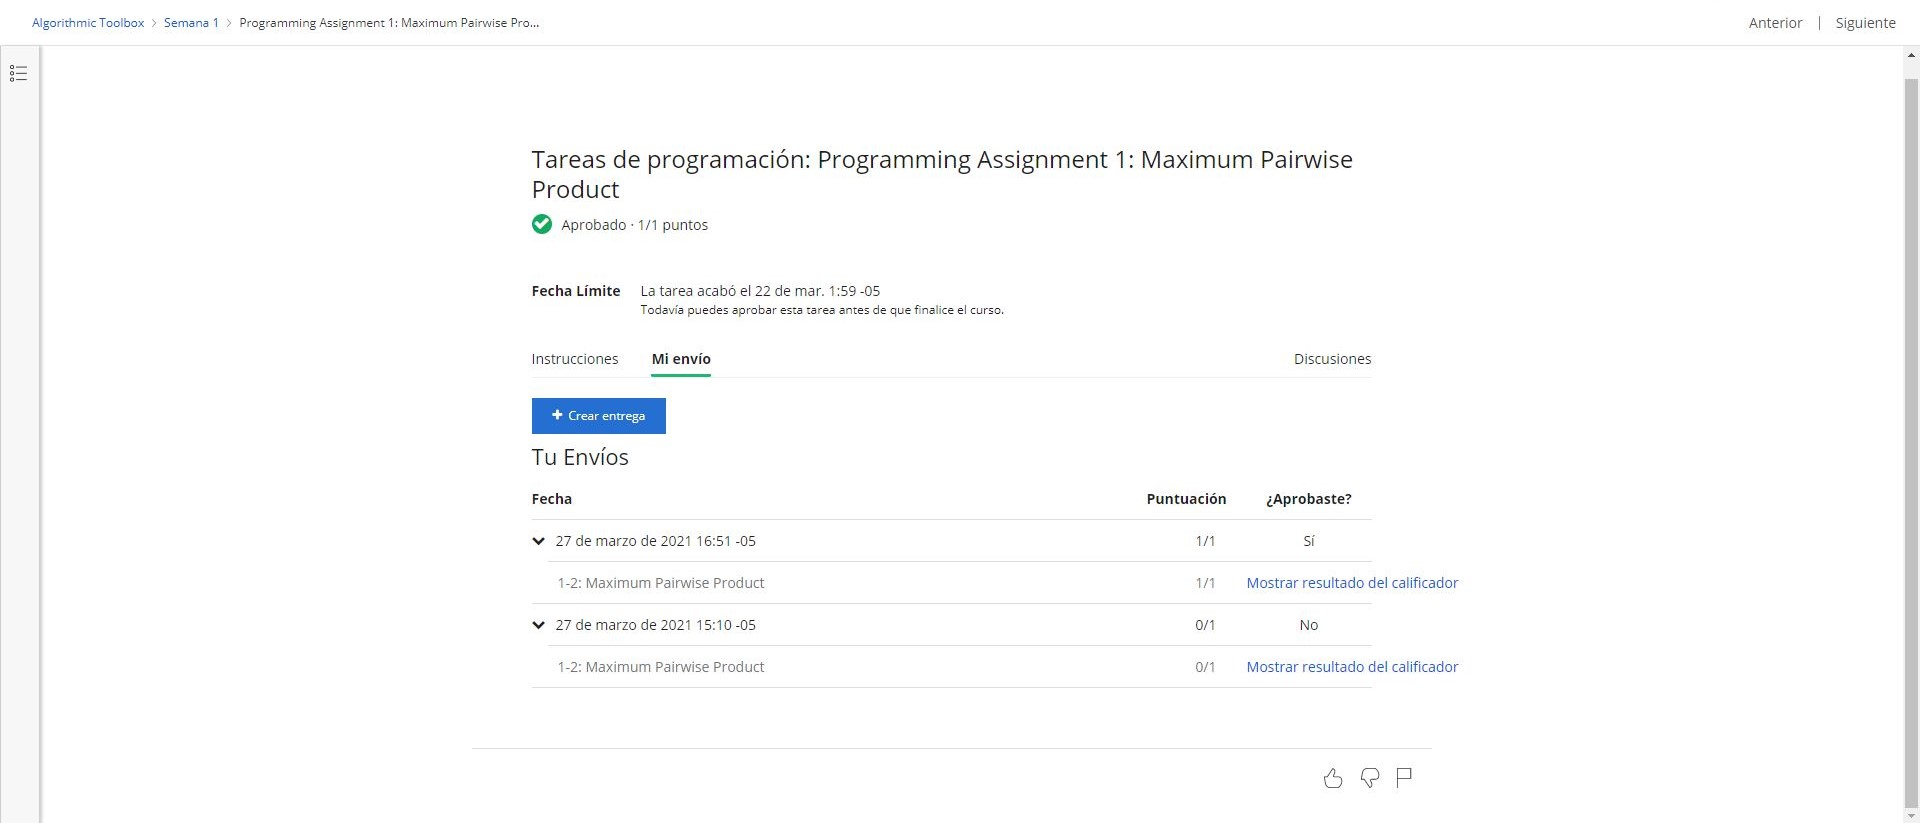

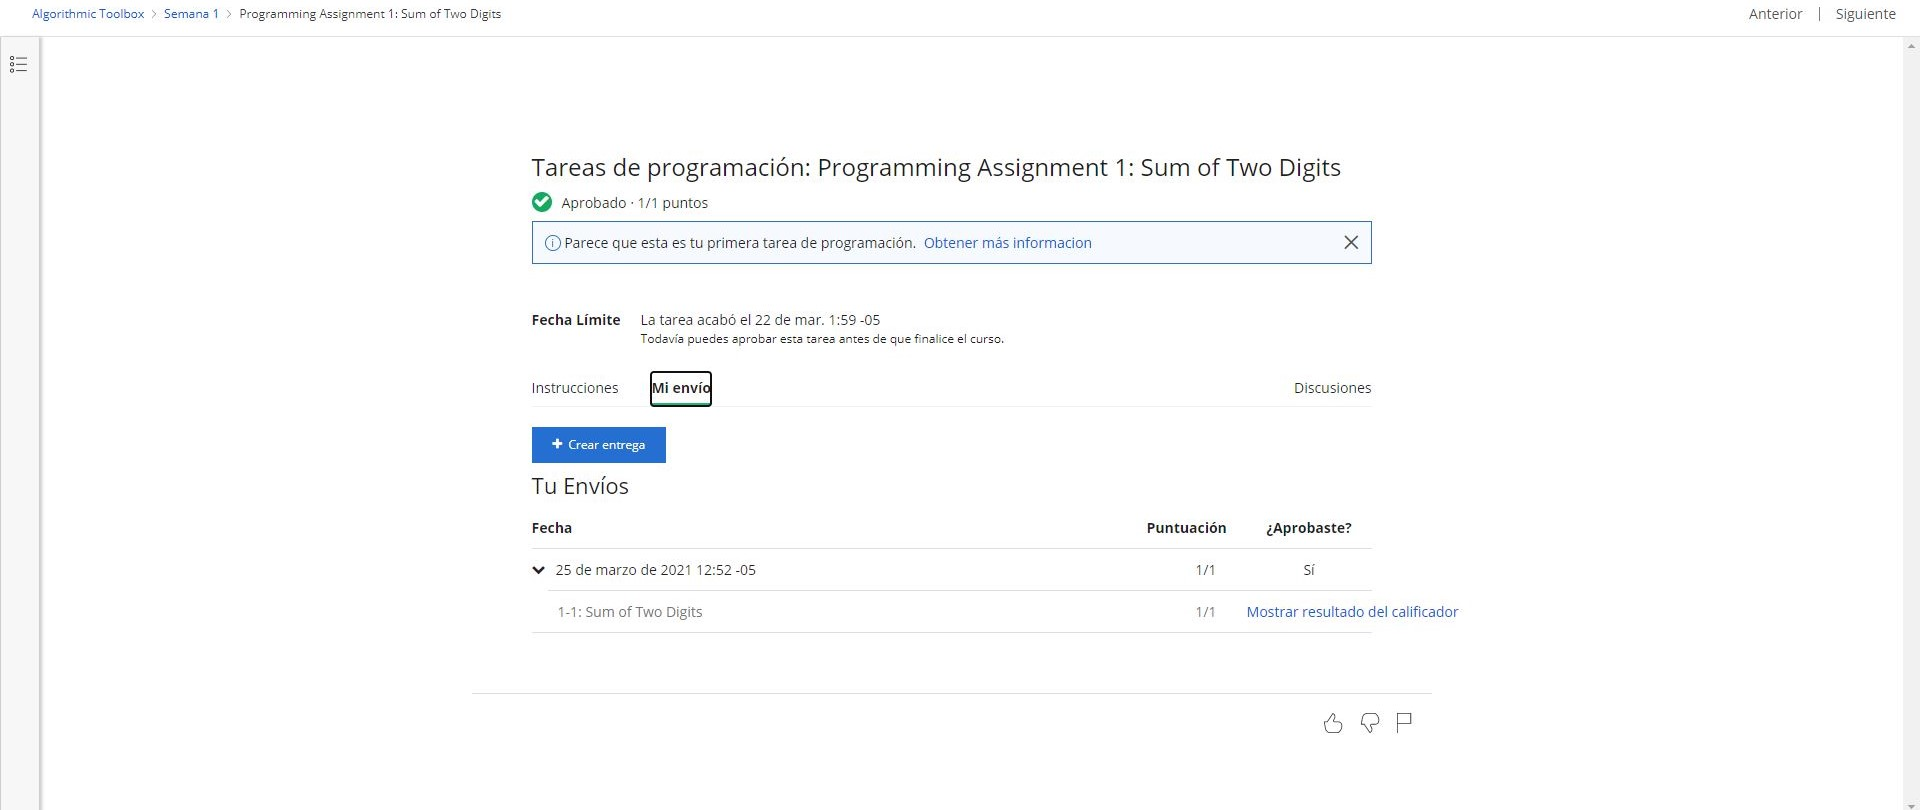

In [273]:
from IPython.display import display, Image
display(Image(filename='/work/CourseraMaximumPairwiseProduct.jpg'))
display(Image(filename='/work/CourseraSumofTwoDigits.jpg'))

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3f8c6564-39de-458b-9d41-98dba29a0d7c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>